### Let's import required packages

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('bmh')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### And the data with a quick look

In [74]:
data = pd.read_csv(r'/Users/Kunal/Downloads/ML/ML-Data/TAMU_FINAL_DATASET_2018.csv', sep=",")
data.head()
len(data)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


100000

### We have 1mn records, lets check for missing values

In [4]:
data.isna().sum()

ID                                   0
AGE                                  0
SEX_CD                              30
AMI_FLAG                             0
ESRD_IND                            32
HOSPICE_IND                         32
ORIG_REAS_ENTITLE_CD                30
RECON_MA_RISK_SCORE_NBR              0
RECON_RX_RISK_SCORE_NBR              0
PCP_ASSIGNMENT                     157
DUAL                                30
INSTITUTIONAL                       30
LIS                                 30
MCO_HLVL_PLAN_CD                    33
MCO_PROD_TYPE_CD                    33
CON_VISIT_04_Q01                     0
CON_VISIT_04_Q02                     0
CON_VISIT_04_Q03                     0
CON_VISIT_04_Q04                     0
CON_VISIT_21_Q01                     0
CON_VISIT_21_Q02                     0
CON_VISIT_21_Q03                     0
CON_VISIT_03_Q02                     0
CON_VISIT_03_Q04                     0
CON_VISIT_05_Q02                     0
CON_VISIT_05_Q04         

### We observe that the displayed features with highest missing records accounts for arround 12% of total, which is ok! 
### We shall later handle missing values. Let's have a look at data info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


### So we have basically three data-types- float, int and object type
### We observed only the displayed null values. We should write a function to subset dataset in which missing values counts less than 30%. Also, ID column isn't required for EDA.

In [6]:
df2 = data[[column for column in data if data[column].count() / len(data) >= 0.3]]
del df2['ID']
print("List of dropped columns:", end=" ")
for c in data.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: ID, 



### It seems that there were no features with more than 30% missing value. Let's pick the 'AGE' feature as a starting point and plot its distribution after describe

count    100000.000000
mean         72.770440
std           9.715514
min          40.000000
25%          68.000000
50%          73.000000
75%          79.000000
max          95.000000
Name: AGE, dtype: float64


/Users/Kunal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


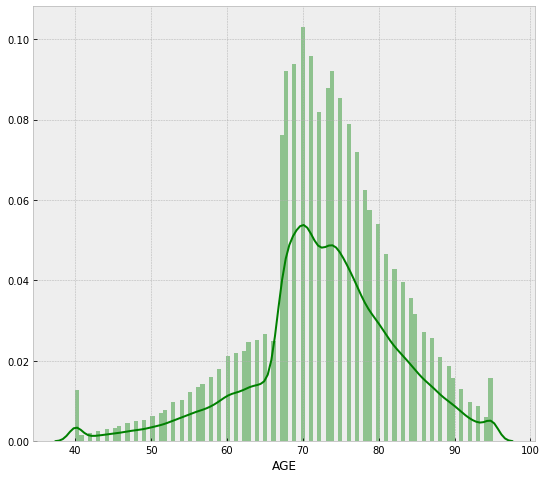

In [7]:
print(df['AGE'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4});

### We can observe that most of the records are for age range 70-80
### Now let's have a look at the dependent variable i.e. the AMI_FLAG variable distribution and their counts

AMI_FLAG
0    97274
1     2726
Name: ID, dtype: int64

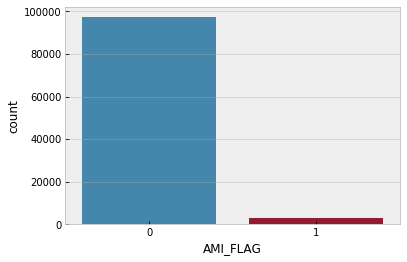

In [75]:
sns.countplot(x='AMI_FLAG', data=data);
data.groupby(['AMI_FLAG']).ID.count()

### This is alarming for model part as this depicts highly imbalanced class. We have just 2.7% positive class records and rest negative( AMI_FLAG = 0). We will take care of this while building up our model
### Let's do similar plot for few more variables

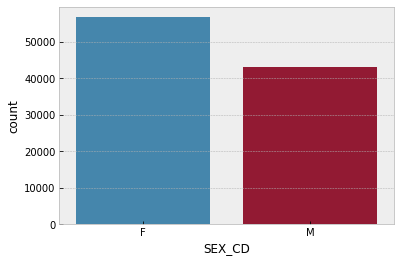

In [9]:
sns.countplot(x='SEX_CD', data=data);

### Clearly, we have more number of Females (>55000) as compared to Males (~ 40000) in our data

### Let's use seaborn to build bar plots of the dataset feature 'AMI_FLAG' split (faceted) over the feature 'SEX_CD'.

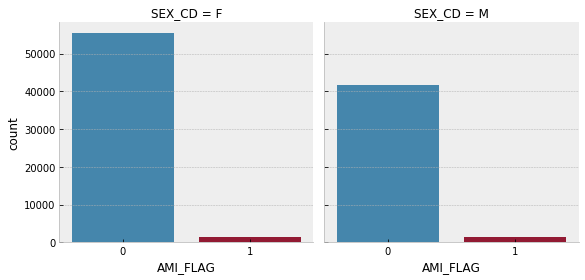

In [71]:
sns.factorplot(x='AMI_FLAG', col='SEX_CD', kind='count', data=data);

### Looking at the plot results, we can't say much about the positive class relationship with gender.  Let's take a look at the positive AMI_FLAG counts, gender wise.

In [11]:
data.groupby(['SEX_CD']).AMI_FLAG.sum()

SEX_CD
F    1292
M    1431
Name: AMI_FLAG, dtype: int64

### We can see that both the genders have nearly equal number of positive AMI_FLAG cases irrespective of the higher female records. Translating it to percentage values.

In [12]:
print(data[data.SEX_CD == 'F'].AMI_FLAG.sum()/data[data.SEX_CD == 'F'].AMI_FLAG.count())
print(data[data.SEX_CD == 'M'].AMI_FLAG.sum()/data[data.SEX_CD == 'M'].AMI_FLAG.count())

0.022759301014656143
0.03312346650618027


### Around 2.2% Females and 3.3% Males have AMI_FLAG = 1.
### Let's take a look at 'AMI_FLAG' split (faceted) over the feature 'CV_CAD' and corresponding counts.

CV_CAD
0    1309
1    1417
Name: AMI_FLAG, dtype: int64

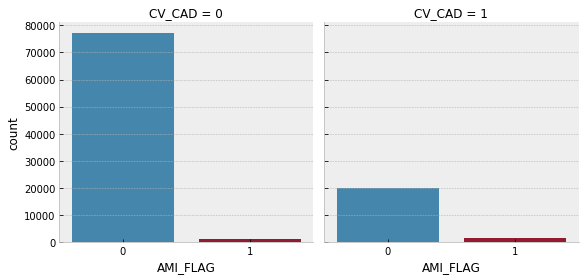

In [76]:
sns.factorplot(x='AMI_FLAG', col='CV_CAD', kind='count', data=data);
data.groupby(['CV_CAD']).AMI_FLAG.sum()

### Here also, the distribution of CV_CAD w.r.t AMI_FLAG is nearly equal. CV_CAD = 1 has 88 more positive AMI_FLAG cases as compared to CV_CAD = 0 cases.

### Use seaborn to plot a histogram of the 'RECON_MA_RISK_SCORE_NBR' column.

/Users/Kunal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AMI_FLAG
0    1.124210
1    1.665266
Name: RECON_MA_RISK_SCORE_NBR, dtype: float64

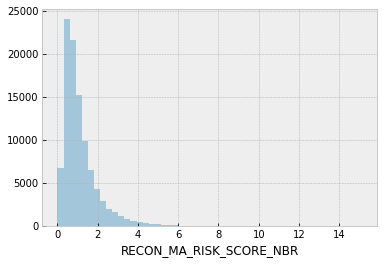

In [81]:
#sns.factorplot(x='AMI_FLAG', col='RECON_MA_RISK_SCORE_NBR', kind='count', data=data);
sns.distplot(data.RECON_MA_RISK_SCORE_NBR, kde=False);
data.groupby(['AMI_FLAG']).RECON_MA_RISK_SCORE_NBR.mean()

### Take-away: Most of the patients scored less than 4 for the medical risk score calculated by CMS. Also, the mean risk score for patients treated with AMI is 1.67 whereas for patients not meeting AMI criteria, avg. risk score is 1.12.

### A similar analysis for RECON_RX_RISK_SCORE_NBR

/Users/Kunal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AMI_FLAG
0    1.022669
1    1.237703
Name: RECON_RX_RISK_SCORE_NBR, dtype: float64

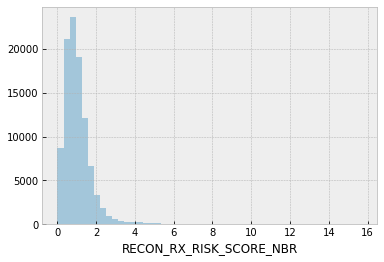

In [82]:
sns.distplot(data.RECON_RX_RISK_SCORE_NBR, kde=False);
data.groupby(['AMI_FLAG']).RECON_RX_RISK_SCORE_NBR.mean()

### Take-away: Most of the patients scored less than 3 for the RX risk score calculated by CMS. Also, the mean risk score for patients treated with AMI is 1.24 whereas for patients not meeting AMI criteria, avg. risk score is ~1.

### Let's do a similar factor plot for CV_SNS against AMI_FLAG.

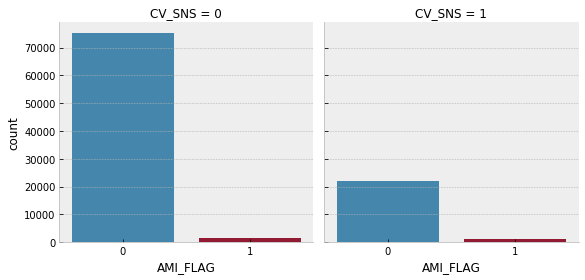

In [84]:
sns.factorplot(x='AMI_FLAG', col='CV_SNS', kind='count', data=data);

/Users/Kunal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


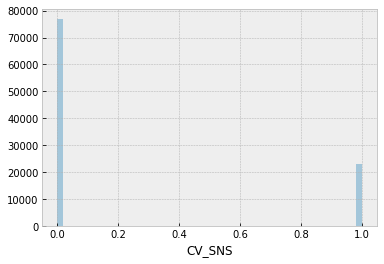

In [17]:
sns.distplot(data.CV_SNS, kde=False);

### We don't see any specific relationship for CV_SNS in the above analysis.

### Let's do a stacked plot including both the genders for all ages.

Populating the interactive namespace from numpy and matplotlib


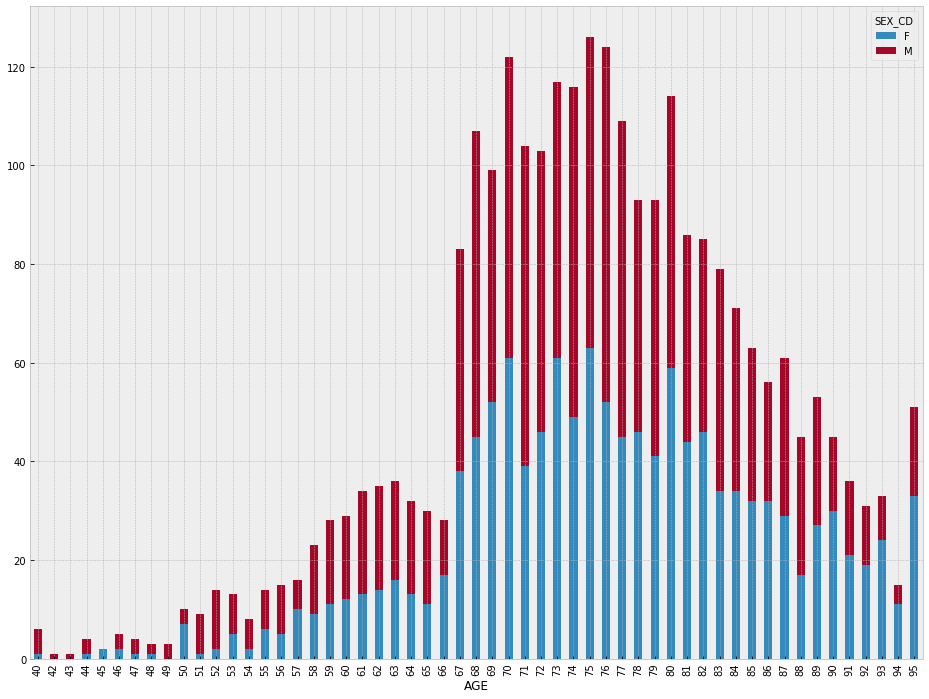

In [18]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
dat = data[['AGE', 'SEX_CD', 'AMI_FLAG']]
dat = dat[dat['AMI_FLAG'] == 1]
ages = dat.AGE.unique()
counts = dat.groupby(['AGE','SEX_CD']).count()
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)

counts.plot(kind='bar', stacked=True, figsize = (16, 12))


### We have very important observations to make here:-
#### 1. There is a huge increase in number of AMI case from AGE >= 67 as compared to the AGE value <= 66.
#### 2. The highest number of AMI cases happened for the age of 75.
#### 3. For AGE <= 65, Males have more no. of AMI cases as compared to AGE >= 66, where Females have more number of AMI cases as compared to Males.
#### 4. Lower end of the AGE (40-50) is dominated mainly by Males for AMI cases.


### Let's continue our EDA and prepare data for same. First check all the data types in data.

In [19]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

### Lets separate the numerical columns together 

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,AGE,AMI_FLAG,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,CON_VISIT_04_Q01,CON_VISIT_04_Q02,CON_VISIT_04_Q03,CON_VISIT_04_Q04,CON_VISIT_21_Q01,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,77,0,0.0,0.424,0.402,3,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
1,49,0,1.0,2.879,1.159,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,75,0,0.0,0.638,0.568,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,1
3,68,0,0.0,0.584,0.886,0,1,0,5,0,...,1,1,0,0,1,1,1,1,1,1
4,81,0,1.0,1.242,1.212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### This dataframe doesn't looks good as it has both continuous and binary data which may not be good for EDA. Lets separate our data in three parts
#### 1. Continuous numerical: data_num
#### 2. String data: data_string
#### 3. Binary columns of zeros & ones: data_zo

### For above processing, first lets separate all the three types of columns.

In [21]:
cols_string1 = ['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'ORIG_REAS_ENTITLE_CD', 'PCP_ASSIGNMENT','Diab_Type','DUAL','Dwelling_Type','Education_level','INSTITUTIONAL','LIS','MCO_HLVL_PLAN_CD','MCO_PROD_TYPE_CD']
len(cols_string1)

13

In [22]:
cols_numeric = [x for x in data.columns if x not in cols_string1]
cols_numeric = [x for x in cols_numeric if x not in ['AMI_FLAG', 'ID']]
#target var: AMT_FLAG
len(cols_numeric)

433

### After going through the data dictionary, we realized that there are few numerical columns which are categorical in nature. Let's add all of them with string columns.

In [23]:
cols_string = cols_string1 + ['CON_VISIT_04_Q01', 'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03',
       'CON_VISIT_04_Q04', 'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02',
       'CON_VISIT_21_Q03', 'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04',
       'CON_VISIT_05_Q02', 'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02',
       'CON_VISIT_10_Q02', 'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04',
       'CON_VISIT_23_Q02', 'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01',
       'CON_VISIT_30_Q02', 'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02',
       'CON_VISIT_33_Q04', 'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02',
       'CON_VISIT_06_Q03', 'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03',
       'CON_VISIT_33_Q02', 'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03',
       'CON_VISIT_10_Q04', 'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01',
       'CON_VISIT_08_Q03', 'CON_VISIT_08_Q04', 'CON_VISIT_11_Q04',
       'CON_VISIT_21_Q04', 'CON_VISIT_25_Q01', 'CON_VISIT_27_Q02',
       'CON_VISIT_27_Q03', 'CON_VISIT_31_Q02', 'CON_VISIT_31_Q04',
       'CON_VISIT_32_Q01', 'CON_VISIT_09_Q03', 'CON_VISIT_31_Q01',
       'CON_VISIT_33_Q01', 'CON_VISIT_24_Q03', 'CON_VISIT_06_Q04',
       'CON_VISIT_33_Q03', 'CON_VISIT_23_Q01', 'CON_VISIT_25_Q04',
       'CON_VISIT_27_Q01', 'CON_VISIT_32_Q04', 'CON_VISIT_24_Q01',
       'CON_VISIT_07_Q04', 'CON_VISIT_19_Q01', 'CON_VISIT_01_Q01',
       'CON_VISIT_01_Q02', 'CON_VISIT_01_Q03', 'CON_VISIT_01_Q04',
       'CON_VISIT_02_Q01', 'CON_VISIT_03_Q01', 'CON_VISIT_11_Q01',
       'CON_VISIT_11_Q03', 'CON_VISIT_17_Q03', 'CON_VISIT_18_Q01',
       'CON_VISIT_26_Q02', 'CON_VISIT_05_Q01', 'CON_VISIT_09_Q01',
       'CON_VISIT_15_Q04', 'CON_VISIT_25_Q03', 'CON_VISIT_32_Q03',
       'CON_VISIT_17_Q04', 'CON_VISIT_31_Q03', 'CON_VISIT_02_Q04',
       'CON_VISIT_17_Q01', 'CON_VISIT_17_Q02', 'CON_VISIT_18_Q04',
       'CON_VISIT_20_Q04', 'CON_VISIT_26_Q01', 'CON_VISIT_26_Q03',
       'CON_VISIT_27_Q04', 'CON_VISIT_30_Q03', 'CON_VISIT_23_Q04',
       'CON_VISIT_19_Q02', 'CON_VISIT_07_Q03', 'CON_VISIT_09_Q04',
       'CON_VISIT_23_Q03', 'CON_VISIT_15_Q01', 'CON_VISIT_15_Q02',
       'CON_VISIT_15_Q03', 'CON_VISIT_26_Q04', 'CON_VISIT_02_Q02',
       'CON_VISIT_03_Q03', 'CON_VISIT_18_Q03', 'CON_VISIT_05_Q03',
       'CON_VISIT_22_Q01', 'CON_VISIT_22_Q02', 'CON_VISIT_22_Q03',
       'CON_VISIT_02_Q03', 'CON_VISIT_11_Q02', 'CON_VISIT_20_Q02',
       'CON_VISIT_20_Q03', 'CON_VISIT_25_Q02', 'CON_VISIT_07_Q01',
       'CON_VISIT_28_Q02', 'CON_VISIT_07_Q02', 'CON_VISIT_20_Q01',
       'CON_VISIT_22_Q04', 'CON_VISIT_28_Q03', 'CON_VISIT_14_Q03',
       'CON_VISIT_14_Q02', 'CON_VISIT_16_Q01', 'CON_VISIT_16_Q02',
       'CON_VISIT_16_Q03', 'CON_VISIT_16_Q04', 'CON_VISIT_28_Q01',
       'CON_VISIT_14_Q01', 'CON_VISIT_14_Q04', 'CON_VISIT_12_Q04',
       'CON_VISIT_28_Q04', 'CON_VISIT_12_Q03', 'CON_VISIT_12_Q01',
       'CON_VISIT_13_Q01', 'CON_VISIT_13_Q04', 'CON_VISIT_12_Q02',
       'CON_VISIT_13_Q02', 'CON_VISIT_13_Q03', 'POT_VISIT_11_Q01',
       'POT_VISIT_11_Q02', 'POT_VISIT_11_Q03', 'POT_VISIT_11_Q04',
       'POT_VISIT_81_Q01', 'POT_VISIT_21_Q02', 'POT_VISIT_23_Q02',
       'POT_VISIT_81_Q02', 'POT_VISIT_81_Q04', 'POT_VISIT_22_Q02',
       'POT_VISIT_12_Q02', 'POT_VISIT_19_Q02', 'POT_VISIT_22_Q03',
       'POT_VISIT_22_Q04', 'POT_VISIT_12_Q01', 'POT_VISIT_12_Q03',
       'POT_VISIT_12_Q04', 'POT_VISIT_22_Q01', 'POT_VISIT_23_Q01',
       'POT_VISIT_23_Q03', 'POT_VISIT_81_Q03', 'POT_VISIT_23_Q04',
       'POT_VISIT_19_Q01', 'POT_VISIT_19_Q04', 'POT_VISIT_20_Q01',
       'POT_VISIT_21_Q04', 'POT_VISIT_41_Q04', 'POT_VISIT_19_Q03',
       'POT_VISIT_21_Q01', 'POT_VISIT_31_Q01', 'POT_VISIT_31_Q02',
       'POT_VISIT_31_Q03', 'POT_VISIT_31_Q04', 'POT_VISIT_32_Q01',
       'POT_VISIT_32_Q02', 'POT_VISIT_32_Q03', 'POT_VISIT_32_Q04',
       'POT_VISIT_41_Q01', 'POT_VISIT_51_Q01', 'POT_VISIT_51_Q02',
       'POT_VISIT_24_Q02', 'POT_VISIT_21_Q03', 'POT_VISIT_41_Q02',
       'POT_VISIT_41_Q03', 'POT_VISIT_53_Q01', 'POT_VISIT_53_Q02',
       'POT_VISIT_53_Q03', 'POT_VISIT_53_Q04', 'POT_VISIT_20_Q02',
       'POT_VISIT_20_Q04', 'POT_VISIT_01_Q03', 'POT_VISIT_17_Q04',
       'POT_VISIT_20_Q03', 'POT_VISIT_24_Q03', 'POT_VISIT_24_Q04',
       'POT_VISIT_24_Q01', 'POT_VISIT_50_Q01', 'POT_VISIT_50_Q02',
       'POT_VISIT_50_Q03', 'POT_VISIT_50_Q04', 'POT_VISIT_72_Q01',
       'POT_VISIT_72_Q02', 'POT_VISIT_72_Q03', 'POT_VISIT_17_Q01',
       'POT_VISIT_15_Q04', 'POT_VISIT_99_Q03', 'POT_VISIT_99_Q04',
       'POT_VISIT_34_Q01', 'POT_VISIT_42_Q02', 'POT_VISIT_61_Q03',
       'POT_VISIT_51_Q04', 'POT_VISIT_72_Q04', 'POT_VISIT_49_Q03',
       'POT_VISIT_02_Q04', 'POT_VISIT_99_Q01', 'POT_VISIT_99_Q02',
       'POT_VISIT_49_Q01', 'POT_VISIT_49_Q02', 'POT_VISIT_15_Q01',
       'POT_VISIT_60_Q04', 'POT_VISIT_33_Q03', 'POT_VISIT_33_Q01',
       'POT_VISIT_13_Q01', 'POT_VISIT_13_Q02', 'POT_VISIT_13_Q03',
       'POT_VISIT_13_Q04', 'POT_VISIT_65_Q02', 'POT_VISIT_65_Q03',
       'POT_VISIT_65_Q04', 'POT_VISIT_49_Q04', 'POT_VISIT_65_Q01',
       'POT_VISIT_33_Q04', 'POT_VISIT_15_Q03', 'POT_VISIT_61_Q02',
       'POT_VISIT_17_Q03', 'POT_VISIT_33_Q02', 'POT_VISIT_71_Q03',
       'POT_VISIT_16_Q02', 'POT_VISIT_61_Q04', 'POT_VISIT_15_Q02',
       'POT_VISIT_51_Q03', 'POT_VISIT_14_Q03', 'POT_VISIT_71_Q01',
       'POT_VISIT_60_Q03', 'POT_VISIT_14_Q01', 'POT_VISIT_14_Q02',
       'POT_VISIT_71_Q04', 'POT_VISIT_52_Q01', 'POT_VISIT_17_Q02',
       'POT_VISIT_60_Q01', 'POT_VISIT_16_Q03', 'POT_VISIT_54_Q04',
       'POT_VISIT_01_Q01', 'POT_VISIT_42_Q04', 'POT_VISIT_16_Q04',
       'POT_VISIT_16_Q01', 'POT_VISIT_61_Q01', 'POT_VISIT_52_Q04',
       'POT_VISIT_71_Q02', 'POT_VISIT_34_Q02', 'POT_VISIT_34_Q03',
       'POT_VISIT_34_Q04', 'POT_VISIT_52_Q02', 'POT_VISIT_04_Q02',
       'POT_VISIT_60_Q02', 'POT_VISIT_62_Q02', 'POT_VISIT_62_Q03',
       'POT_VISIT_02_Q01', 'POT_VISIT_62_Q04', 'POT_VISIT_52_Q03',
       'POT_VISIT_42_Q01', 'POT_VISIT_01_Q04', 'POT_VISIT_62_Q01',
       'POT_VISIT_42_Q03', 'POT_VISIT_09_Q01', 'POT_VISIT_04_Q01',
       'POT_VISIT_05_Q01', 'POT_VISIT_01_Q02', 'POT_VISIT_14_Q04',
       'POT_VISIT_07_Q01', 'POT_VISIT_07_Q02', 'POT_VISIT_07_Q03',
       'POT_VISIT_07_Q04', 'POT_VISIT_26_Q04', 'POT_VISIT_55_Q02',
       'POT_VISIT_26_Q02', 'POT_VISIT_03_Q04', 'POT_VISIT_57_Q04',
       'POT_VISIT_56_Q03', 'POT_VISIT_18_Q01', 'POT_VISIT_54_Q01',
       'POT_VISIT_54_Q02', 'POT_VISIT_54_Q03', 'POT_VISIT_03_Q01',
       'POT_VISIT_25_Q01', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016', 'RX_THER_90_YR2016', 'RX_THER_01_YR2016',
       'RX_THER_05_YR2016', 'RX_THER_22_YR2016', 'RX_THER_37_YR2016',
       'RX_THER_39_YR2016', 'RX_THER_43_YR2016', 'RX_THER_49_YR2016',
       'RX_THER_57_YR2016', 'RX_THER_60_YR2016', 'RX_THER_28_YR2016',
       'RX_THER_27_YR2016', 'RX_THER_34_YR2016', 'RX_THER_16_YR2016',
       'RX_THER_41_YR2016', 'RX_THER_02_YR2016', 'RX_THER_18_YR2016',
       'RX_THER_50_YR2016', 'RX_THER_97_YR2016', 'RX_THER_61_YR2016',
       'RX_THER_66_YR2016', 'RX_THER_56_YR2016', 'RX_THER_03_YR2016',
       'RX_THER_75_YR2016', 'RX_THER_72_YR2016', 'RX_THER_79_YR2016',
       'RX_THER_12_YR2016', 'RX_THER_86_YR2016', 'RX_THER_32_YR2016',
       'RX_THER_33_YR2016', 'RX_THER_21_YR2016', 'RX_THER_46_YR2016',
       'RX_THER_62_YR2016', 'RX_THER_68_YR2016', 'RX_THER_94_YR2016',
       'RX_THER_04_YR2016', 'RX_THER_59_YR2016', 'RX_THER_69_YR2016',
       'RX_THER_85_YR2016', 'RX_THER_11_YR2016', 'RX_THER_30_YR2016',
       'RX_THER_54_YR2016', 'RX_THER_31_YR2016', 'RX_THER_83_YR2016',
       'RX_THER_13_YR2016', 'RX_THER_35_YR2016', 'RX_THER_89_YR2016',
       'RX_THER_78_YR2016', 'RX_THER_53_YR2016', 'RX_THER_77_YR2016',
       'RX_THER_88_YR2016', 'RX_THER_23_YR2016', 'RX_THER_52_YR2016',
       'RX_THER_73_YR2016', 'RX_THER_99_YR2016', 'RX_THER_82_YR2016',
       'RX_THER_07_YR2016', 'RX_THER_93_YR2016', 'RX_THER_74_YR2016',
       'RX_THER_55_YR2016', 'RX_THER_24_YR2016', 'RX_THER_67_YR2016',
       'RX_THER_64_YR2016', 'RX_THER_87_YR2016', 'RX_THER_47_YR2016',
       'RX_THER_38_YR2016', 'RX_THER_40_YR2016', 'RX_THER_09_YR2016',
       'RX_THER_51_YR2016', 'RX_THER_26_YR2016', 'RX_THER_25_YR2016',
       'RX_THER_81_YR2016', 'RX_THER_48_YR2016', 'RX_THER_95_YR2016',
       'RX_THER_45_YR2016', 'RX_THER_76_YR2016', 'RX_THER_80_YR2016',
       'RX_THER_15_YR2016', 'RX_THER_19_YR2016', 'RX_THER_96_YR2016',
       'RX_THER_92_YR2016', 'RX_THER_98_YR2016', 'RX_THER_84_YR2016',
       'RX_THER_08_YR2016'] #, 'CDC_LDL100_GAP'

cols_zo = ['CV_CAD', 'CV_CHF', 'CV_CIR', 'CV_CER',
       'CV_HDZ', 'CV_SNS', 'CV_PVD', 'RES_ALG', 'RES_AST', 'RES_COPD',
       'RES_FAIL', 'RES_INF', 'DIABETES',
       'Diab_Complications', 'PREDIABETES', 'HYPERTENSION', 'HYPERLIPID',
       'RENAL', 'CKD', 'ESRD', 'MUSCUL_OTH', 'MUSCUL_BN', 'OSTEO', 'ARTH', 'College','CDC', 'CDC_HBATEST_GAP',
       'CDC_HBAPOOR_GAP', 'CDC_NPH_GAP', 'CDC_EYE_GAP', 'BCS', 'BCS_GAP',
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG']

### We need to update out numeric columns now.

In [24]:
cols_numeric = [x for x in data.columns if x not in cols_string] 
cols_numeric = [x for x in cols_numeric if x not in  cols_zo]
cols_numeric = [x for x in cols_numeric if x not in ['AMI_FLAG', 'ID']]
#target var: AMT_FLAG
len(cols_numeric)

18

### Finally, let's create out numerical data frame and have a look at it.

In [25]:
data_num = data[cols_numeric]
data_num['AMI_FLAG'] = data.AMI_FLAG
data_num.head(5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AGE,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,Length_residence,Est_BMI_decile,Num_person_household,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Decile_struggle_Med_lang,Home_value,Est_Net_worth,Est_income,Index_Health_ins_engage,Index_Health_ins_influence,Population_density_centile_ST,Population_density_centile_US,AMI_FLAG
0,77,0.424,0.402,13.0,7.0,3.0,0.0,1.0,94.0,6.0,5.0,127.0,87500.0,87500.0,3.0,2.0,70.0,84.0,0
1,49,2.879,1.159,3.0,0.0,3.0,1.0,1.0,86.0,14.0,NaN,128.0,-2500.0,7500.0,1.0,4.0,83.0,86.0,0
2,75,0.638,0.568,8.0,9.0,1.0,0.0,1.0,95.0,5.0,5.0,359.0,625000.0,112000.0,1.0,9.0,30.0,30.0,0
3,68,0.584,0.886,1.0,4.0,1.0,0.0,1.0,90.0,10.0,7.0,280.0,-2500.0,55000.0,2.0,4.0,16.0,18.0,0
4,81,1.242,1.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Nice!, A quick histogram plot for all numerical columns will be good to observe.

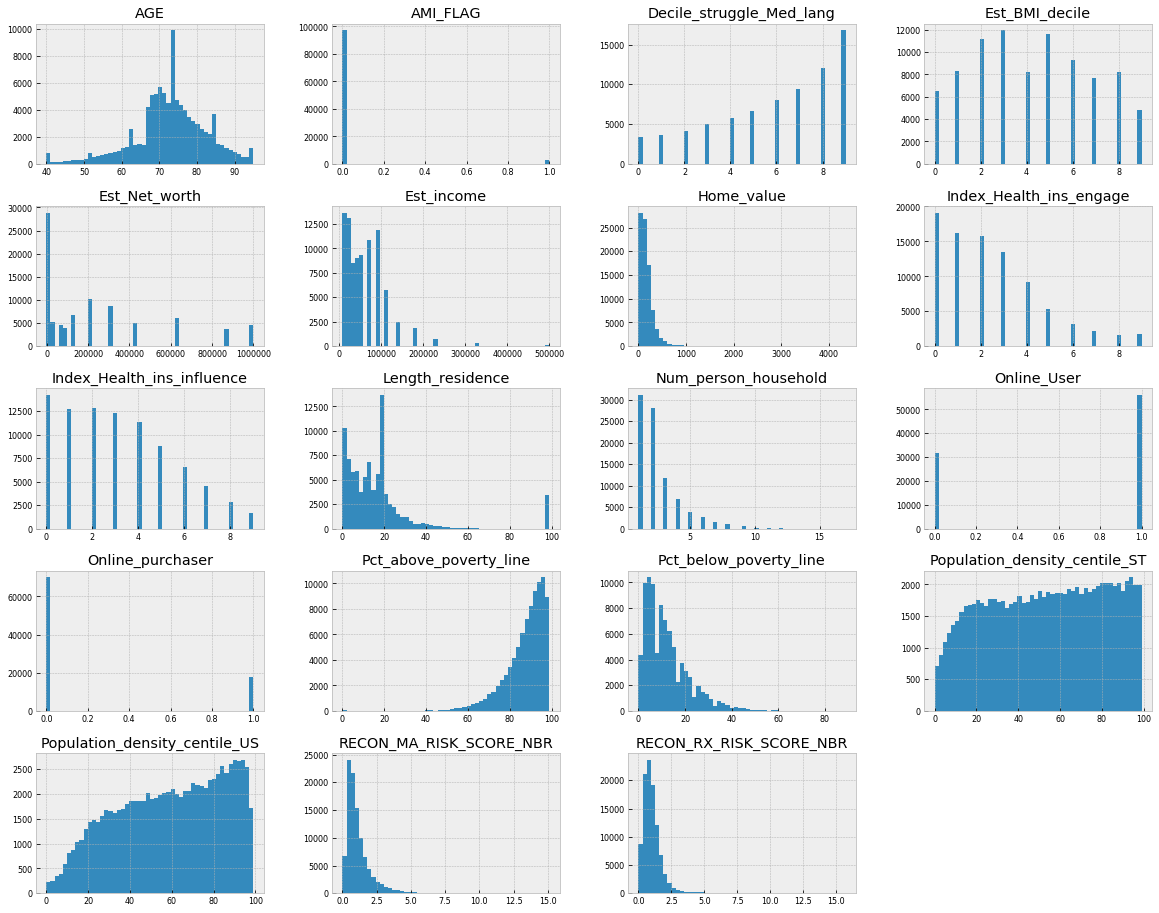

In [26]:
data_num.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8);

### Observations
#### 1. Features with similar nature of 'discrete decreasing distribution':- Est_Net_worth, Est_income, Index_Health_ins_engage, Index_Health_ins_influence, Num_person_household
#### 2. Features with similar nature of 'continuous decreasing distribution':- Home_value, Length_residence, Pct_below_poverty_line, RECON_MA_RISK_SCORE_NBR, RECON_RX_RISK_SCORE_NBR
#### 3. Features with similar nature of 'continuous increasing distribution': Population_density_centile_ST, Population_density_centile_US

### Let's take a quick look at the distribution of AMI_FLAG for variables in the ablove dataset not covered earlier


In [107]:
data.groupby(['AMI_FLAG']).AGE.mean()
data.groupby(['AMI_FLAG']).Est_income.median()
data.groupby(['AMI_FLAG']).Home_value.mean()
data.groupby(['AMI_FLAG']).Length_residence.mean()
data.groupby(['AMI_FLAG']).Pct_above_poverty_line.mean()
data.groupby(['AMI_FLAG']).Pct_below_poverty_line.mean()
data.groupby(['AMI_FLAG']).Population_density_centile_ST.mean()
data.groupby(['AMI_FLAG']).Population_density_centile_US.mean()
data.groupby(['Decile_struggle_Med_lang']).AMI_FLAG.sum()
data.groupby(['Est_BMI_decile']).AMI_FLAG.sum()
data.groupby(['Est_Net_worth']).AMI_FLAG.sum()
data.groupby(['Est_income']).AMI_FLAG.sum()
data.groupby(['Index_Health_ins_engage']).AMI_FLAG.sum()
data.groupby(['Index_Health_ins_influence']).AMI_FLAG.sum()
data.groupby(['Num_person_household']).AMI_FLAG.sum()
data.groupby(['Online_User']).AMI_FLAG.sum()
data.groupby(['Online_purchaser']).AMI_FLAG.sum()
data.groupby(['Index_Health_ins_influence']).AMI_FLAG.sum()

AMI_FLAG
0    72.701595
1    75.227073
Name: AGE, dtype: float64

AMI_FLAG
0    45000.0
1    45000.0
Name: Est_income, dtype: float64

AMI_FLAG
0    164.576123
1    145.947458
Name: Home_value, dtype: float64

AMI_FLAG
0    16.732265
1    16.177275
Name: Length_residence, dtype: float64

AMI_FLAG
0    87.842022
1    86.800940
Name: Pct_above_poverty_line, dtype: float64

AMI_FLAG
0    12.066144
1    13.061085
Name: Pct_below_poverty_line, dtype: float64

AMI_FLAG
0    53.324649
1    52.899616
Name: Population_density_centile_ST, dtype: float64

AMI_FLAG
0    59.062026
1    58.541222
Name: Population_density_centile_US, dtype: float64

Decile_struggle_Med_lang
0.0     70
1.0     76
2.0     74
3.0    114
4.0    142
5.0    165
6.0    204
7.0    242
8.0    346
9.0    562
Name: AMI_FLAG, dtype: int64

Est_BMI_decile
0.0    204
1.0    281
2.0    329
3.0    342
4.0    224
5.0    300
6.0    261
7.0    167
8.0    153
9.0     80
Name: AMI_FLAG, dtype: int64

Est_Net_worth
-2500.0       497
 2500.0       201
 15000.0      206
 37500.0      149
 62500.0      128
 87500.0      111
 125000.0     164
 200000.0     271
 312500.0     194
 437500.0     115
 625000.0     146
 875000.0      78
 1000000.0     81
Name: AMI_FLAG, dtype: int64

Est_income
7500.0      417
17500.0     143
25000.0     252
35000.0     242
45000.0     238
55000.0     283
67500.0     296
87500.0     258
112000.0    108
137500.0     43
175000.0     41
225000.0     14
325000.0      3
450000.0      1
500000.0      2
Name: AMI_FLAG, dtype: int64

Index_Health_ins_engage
0.0    513
1.0    411
2.0    443
3.0    361
4.0    241
5.0    137
6.0     85
7.0     58
8.0     39
9.0     53
Name: AMI_FLAG, dtype: int64

Index_Health_ins_influence
0.0    400
1.0    340
2.0    345
3.0    321
4.0    332
5.0    229
6.0    160
7.0    102
8.0     85
9.0     27
Name: AMI_FLAG, dtype: int64

Num_person_household
1.0     883
2.0     731
3.0     274
4.0     170
5.0      95
6.0      74
7.0      54
8.0      32
9.0      14
10.0     10
11.0      2
12.0      1
13.0      0
14.0      0
15.0      0
17.0      1
Name: AMI_FLAG, dtype: int64

Online_User
0.0     902
1.0    1439
Name: AMI_FLAG, dtype: int64

Online_purchaser
0.0    1877
1.0     464
Name: AMI_FLAG, dtype: int64

Index_Health_ins_influence
0.0    400
1.0    340
2.0    345
3.0    321
4.0    332
5.0    229
6.0    160
7.0    102
8.0     85
9.0     27
Name: AMI_FLAG, dtype: int64

### Observations
#### 1. AGE:- AMI cases has avg. age of 75.
#### 2. Est_income:- Median Income for both AMI and non-AMI cases is 45000
#### 3. Home_value:- AMI cases has avg. value of 146 which is lower than that of non-AMI cases which is 164.5
#### 4. Length_residence:- AMI cases has avg. value of 16.7 and non-AMI 16.1
#### 5. Pct_above_poverty_line:- Avg. value for AMI cases = 86.8 and for non-AMI, its 87.8
#### 6. Pct_below_poverty_line:- Avg. value for AMI cases = 13 and for non-AMI, its 12
#### 7. Population_density_centile_ST:- Avg. value for AMI cases ~ 53 and for non-AMI cases, its 53.3
#### 8. Population_density_centile_US:- Avg. value for AMI cases ~ 58.5 - higher than centile_ST value for AMI and for non-AMI cases, its 59
#### 9. Decile_struggle_Med_lang:- Increasing number of AMI cases with Decile values(0-9, descrete). Highest AMI count of 562 at Decile value of 9.
#### 10. Est_BMI_decile:- Highest AMI counts = 342 for a Est_BMI_decile value of 3. Observed high AMI counts for decile values = 1,2,3 and 5.
#### 11. Est_Net_worth:- Highest AMI counts = 497 observed at Est_Net_worth value of -2500- a negative value**. Also, there is a bump at Est_Net_worth = 200000 with AMI counts = 271. Further AMI counts decreases with increasing Est_Net_worth.
#### 12. Est_income:- Lower Income more prone to AMI. Est_income = 7500 has a high count of AMI = 417.
#### 13. Index_Health_ins_engage:- Decreasing in nature. Highest AMI count = 513 at Index_Health_ins_engage = 0. Ranges 0-9.
#### 14. Index_Health_ins_influence:- Decreasing in nature. Highest AMI count = 400 at Index_Health_ins_engage = 0. Ranges 0-9.
#### 15. Num_person_household:- Low number of household person are more prone to AMI. HIghest AMI count = 883 with household count  = 1 and 731 with household count . = 2. Household count = 1 or 2 have high chances of AMI.
#### 16. Online_User:- Online users are more prone to AMI as compared to offline users. 
#### 17. Online_purchaser:- Online purchasers are less prone to AMI as compared to offline purchasers. Significant ratio of ~ 0.24 of AMI Vs. non-AMI for online purchaser Vs. offline purchaser.
#### 18. Index_Health_ins_influence:- Low Index indicates higher chances of AMI. Index = 0 has AMI count  = 400. Index ranging from 0 to 9.


### Let's pull out features which are correlated with AMI_FLAG with a correlation of more than 5%.  Correlation of continuous features with binary column like AMI_FLAG doesn't actually makes much sense but we can always take a look at the linear relationship of variables.

In [27]:
df_num_corr = data_num.corr()['AMI_FLAG'][:-1] # -1 because the latest row is AMI_FLAG
golden_features_list = df_num_corr[abs(df_num_corr) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with AMI FLAG:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with AMI FLAG:
RECON_MA_RISK_SCORE_NBR    0.093049
Name: AMI_FLAG, dtype: float64


### We find only one variable, RECON_MA_RISK_SCORE_NBR which has a significant correlation with target variable.
### Let's do a pairplot of all the numric variables with AMI_FLAG.

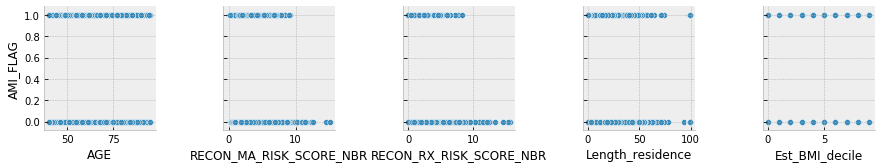

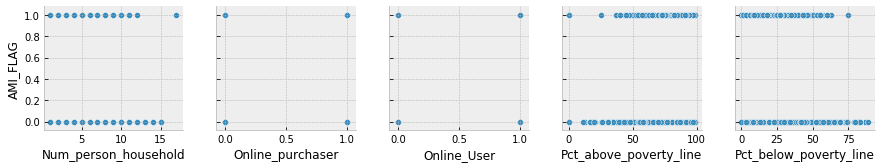

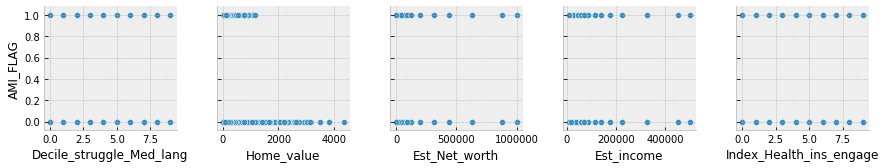

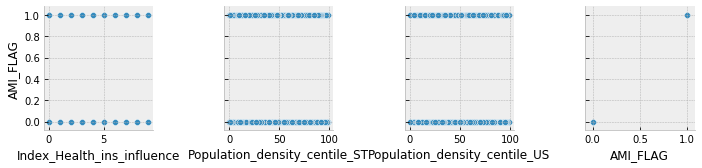

In [28]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['AMI_FLAG'])

### Now, let's separate the binary feature columns dataframe and string data frame. Also, we will impute numerical columns with mean values and string columns with a string value 'NA'. For binary feature columns, we will take a look at the missing value and then the 1-0 distribution to decide which value should be placed in place of missing rows.

In [29]:
data_string = data[cols_string]
data_zo = data[cols_zo]

In [30]:
data_num = data_num.fillna(data_num.mean())
data_string = data_string.fillna('NA')

In [31]:
data_zo.isna().sum()

CV_CAD                    0
CV_CHF                    0
CV_CIR                    0
CV_CER                    0
CV_HDZ                    0
CV_SNS                    0
CV_PVD                    0
RES_ALG                   0
RES_AST                   0
RES_COPD                  0
RES_FAIL                  0
RES_INF                   0
DIABETES                  0
Diab_Complications        0
PREDIABETES               0
HYPERTENSION              0
HYPERLIPID                0
RENAL                     0
CKD                       0
ESRD                      0
MUSCUL_OTH                0
MUSCUL_BN                 0
OSTEO                     0
ARTH                      0
College               12179
CDC                       0
CDC_HBATEST_GAP           0
CDC_HBAPOOR_GAP           0
CDC_NPH_GAP               0
CDC_EYE_GAP               0
BCS                       0
BCS_GAP                   0
COL                       0
COL_GAP                   0
AMM                       0
AMM_GAP             

In [32]:
data_zo['College'].astype(bool).sum(axis=0)


18977

### We observe that only 'College' feature has missing values which counts to 12179. Also, total number of AMI_FLAG = 1 cases are 18977 and remaining 68844 are 0's. Therefore, its fine to impute missing with 0's for this data frame.

In [33]:
data_zo = data_zo.fillna(0)

### We can always combine the three separate dataframe after initial null treatment to a single dataframe.

In [109]:
frames = (data_num, data_string, data_zo)
processed_data = pd.concat(frames, axis = 1)

### Let's add back AMI_FLAG column for some more EDA.

In [35]:
processed_data['AMI_FLAG'] = data['AMI_FLAG']
data_num['AMI_FLAG'] = data['AMI_FLAG']

### Let's use seaborn to plot a scatter plot of 'Age' against 'Est_income', colored by 'AMI_FLAG'.

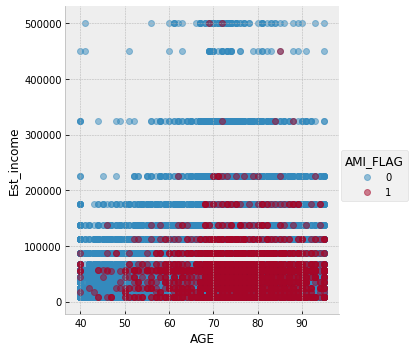

In [60]:
sns.lmplot(x='AGE', y='Est_income', hue='AMI_FLAG', data=data_num, fit_reg=False, scatter_kws={'alpha':0.5});

### Take-away:- 
#### 1. Low Income (< 100000) and large AGE value (>= 55) are more prone to AMI.
#### 2. High Income and small AGE has nearly zero AMI cases.
#### 3. High Income and High AGE also has nearly zero AMI cases.
#### 4. Low Income and small age has some cases of AMI.


### Let's continue the same analysis for few more variables.

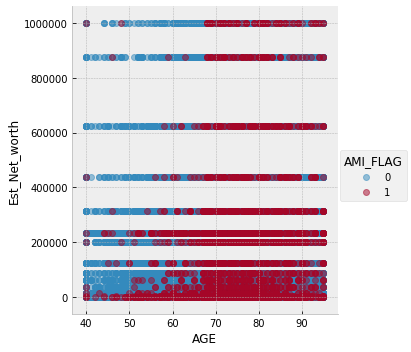

In [61]:
sns.lmplot(x='AGE', y='Est_Net_worth', hue='AMI_FLAG', data=data_num, fit_reg=False, scatter_kws={'alpha':0.5});

### Take-away:-
#### 1. Large AGE values are more prone to AMI for both small and large Est_Net_worth values.
#### 2. Small AGE values for high Est_Net_worth values has nearly zero cases of AMI.
#### 3. Small AGE and small Est_Net_worth has very few cases of AMI.

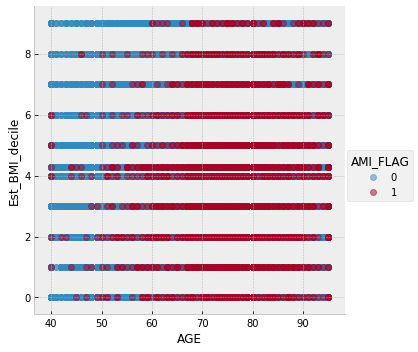

In [62]:
sns.lmplot(x='AGE', y='Est_BMI_decile', hue='AMI_FLAG', data=data_num, fit_reg=False, scatter_kws={'alpha':0.5});

### Est_BMI_decile has similary nature to Est_Net_worth when comapring AMI_FLAG distribution w.r.t. AGE.